In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# build a DataFrame from the Microsoft (fake) data posted from Kaggle
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.shape

(1470, 35)

In [6]:
df.get_dtype_counts()

int64     26
object     9
dtype: int64

In [4]:
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


In [5]:
# list(df.columns) prints a stacked list
for item in list(df.columns):
    print(item, end=" ")

Age Attrition BusinessTravel DailyRate Department DistanceFromHome Education EducationField EmployeeCount EmployeeNumber EnvironmentSatisfaction Gender HourlyRate JobInvolvement JobLevel JobRole JobSatisfaction MaritalStatus MonthlyIncome MonthlyRate NumCompaniesWorked Over18 OverTime PercentSalaryHike PerformanceRating RelationshipSatisfaction StandardHours StockOptionLevel TotalWorkingYears TrainingTimesLastYear WorkLifeBalance YearsAtCompany YearsInCurrentRole YearsSinceLastPromotion YearsWithCurrManager 

### Check min and max of each variable for obvious errors

In [8]:
df.apply(lambda colmn: pd.Series([colmn.min(), colmn.max()],index=['min', 'max']))  # pd.Series is simply an Excel column
                                                                        # lambda arguments : expression

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
min,18,No,Non-Travel,102,Human Resources,1,1,Human Resources,1,1,...,1,80,0,0,0,1,0,0,0,0
max,60,Yes,Travel_Rarely,1499,Sales,29,5,Technical Degree,1,2068,...,4,80,3,40,6,4,40,18,15,17


Transpose to be able to see all columns on screen.

In [9]:
mmdf=df.apply(lambda colmn: pd.Series([colmn.min(), colmn.max()],index=['min', 'max']))
print(mmdf.T)

                                                min                   max
Age                                              18                    60
Attrition                                        No                   Yes
BusinessTravel                           Non-Travel         Travel_Rarely
DailyRate                                       102                  1499
Department                          Human Resources                 Sales
DistanceFromHome                                  1                    29
Education                                         1                     5
EducationField                      Human Resources      Technical Degree
EmployeeCount                                     1                     1
EmployeeNumber                                    1                  2068
EnvironmentSatisfaction                           1                     4
Gender                                       Female                  Male
HourlyRate                            

In [10]:
print(df.describe(include='object'))  # a built-in function which is not entirely useful

       Attrition BusinessTravel              Department EducationField Gender  \
count       1470           1470                    1470           1470   1470   
unique         2              3                       3              6      2   
top           No  Travel_Rarely  Research & Development  Life Sciences   Male   
freq        1233           1043                     961            606    882   

                JobRole MaritalStatus Over18 OverTime  
count              1470          1470   1470     1470  
unique                9             3      1        2  
top     Sales Executive       Married      Y       No  
freq                326           673   1470     1054  


### Are distributions of numerical variables normal?
Whether a sample is normal dictates the types of statistical methods to use: parametric or nonparametric.

In [24]:
# Remove columns with very large numbers to be able to fit many columns in the same graph, the same Y axis
small_df=df.select_dtypes(include=['int64']).drop(columns=['Age','MonthlyIncome', 'MonthlyRate','EmployeeNumber','DailyRate','HourlyRate','StandardHours'])    #or num_df=df.iloc[:, [0,5,12,13,14,16]]

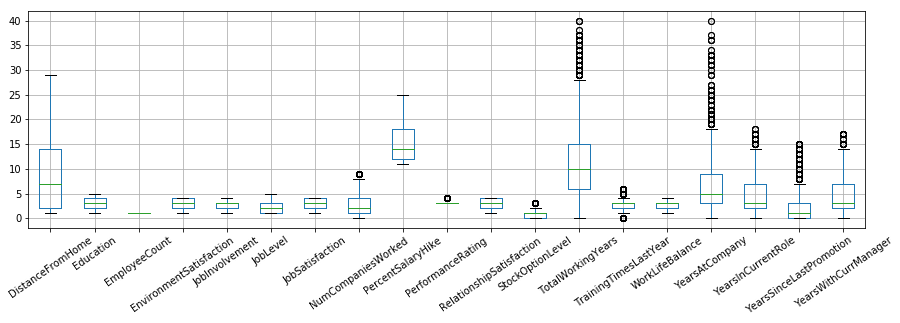

In [54]:
fig = plt.figure(figsize=(15, 4))  # plt.figure() creates a figure of size 432 x 288 with 0 axes
ax = small_df.boxplot()            # fig and ax here are part of the object oriented interface 
boxplot = small_df.boxplot()       # create boxplots for all columns df.boxplot() or indicate the columns (columns=['Col1', 'Col2'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=35)   # (explicitly modify the axis created beforehand (not using plt.))
plt.show()                         # Python waits for a call to show method to display the plot

***
HOW TO INTERPRET: The main part of the box shows where the middle portion of the data is. The median is shown by a horizontal bar in the center of the box. At the ends of the box, is the first quartile (the 25% mark) and the third quartile (the 75% mark).  Due to outliers, the ends of the whiskers here represent one and a half times the interquartile range which is the box. 

When the median is in the middle of the box, and the whiskers are about the same on both sides of the box, then the distribution is symmetric. 

Box plots are more useful to visualize differences among different groups on the same variable (e.g. one group's median falls outside another group's box). Here we just have a general look at distributions and outliers. 
***
The variable **YearsAtCompany** has many outliers. It may be a red flag indicating large attrition with most employees staying at the company only for a short time. The median in this dataset is 5 years which is not alarmingly short (such as a 1-2 year turnover) but also not desirable. Let's look at the histogram.

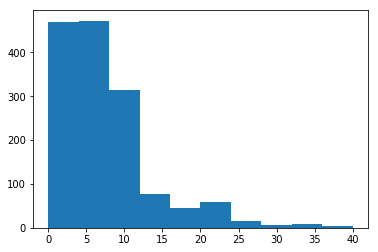

In [13]:
plt.hist(df['YearsAtCompany'])
plt.show()

Visually, a shape to the data is not the familiar bell-shape therefore we can state that distribution is not normal.

Statistically, we can use Q-Q plot. Deviations by the dots from the line shows a deviation from the expected normal distribution.

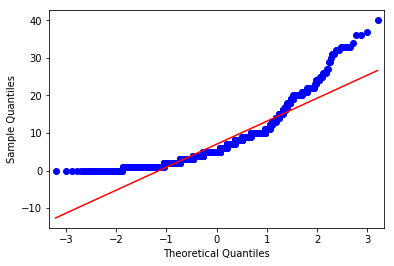

In [15]:
from statsmodels.graphics.gofplots import qqplot
qqplot(df['YearsAtCompany'], line='s')                 # draw the standardized line by setting the ‘line‘ argument to ‘s‘
plt.show()

The Shapiro-Wilk test evaluates a data sample and calculates the likelihood of it being drawn from Normal distribution.

In [26]:
from scipy.stats import shapiro
st, p = shapiro(df['YearsAtCompany'])
print('Statistics=%.2f, p=%.2f' % (st, p))
alpha = 0.05
if p > alpha:
    print('Sample is Normally distributed (do not reject H0)')
else:
    print('Sample is not Normally distributed (reject H0)')

Statistics=0.84, p=0.00
Sample is not Normally distributed (reject H0)


# Variables of interest

Frequently, employers are most interested in attrition due to costs of training new employees. 
The most researched aspect in that regard is job satisfaction and how organizational culture impacts it, taking into account: employees' gender and age, job role, distance from work etc. Employees experience greater levels of job satisfaction when their abilities and experiences are utilized in the organizational environment (Buitendach and De Witte, 2005). 
Organizations can use these findings by shaping their culture to enhance the overall level of job satisfaction of their employees and willingness to remain. 

In [11]:
# calculate mean job satisfaction
JSmean = df.JobSatisfaction.mean()
print(JSmean)

2.7285714285714286


In [15]:
# summarize job satisfaction
print(df.JobSatisfaction.describe())

count    1470.000000
mean        2.728571
std         1.102846
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: JobSatisfaction, dtype: float64


# Distribution of Job Satisfaction by Attrition

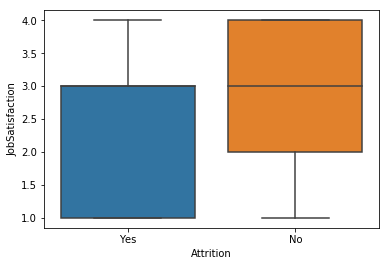

In [55]:
## Seaborn plots
sns.boxplot(data=df, x='Attrition', y='JobSatisfaction')

As expected, employees who did not have to leave the company for various reasons, are more satisfied.

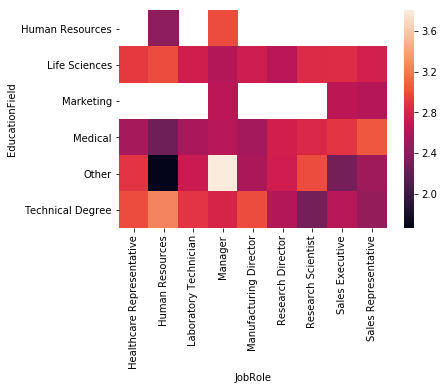

In [12]:
## Grouping of categorical variables

pivot = df.pivot_table(
    index=["EducationField"],
    columns=["JobRole"],
    values="JobSatisfaction",
    aggfunc=np.average)
sns.heatmap(pivot)

## Matplot plots

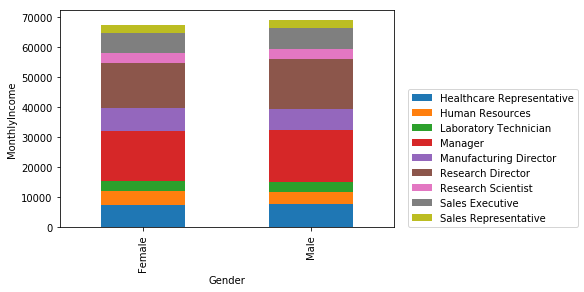

In [33]:
# categorical data grouping in Pandas to display a graph of 3 variables
df_MI_agg = df.groupby(['Gender','JobRole'])['MonthlyIncome'].mean().unstack()
df_MI_agg.plot(kind='bar', stacked=True)
plt.legend(loc=(1.04,0))       # to place the legend OUTSIDE of the axes bounding box
plt.ylabel('MonthlyIncome')
plt.savefig('MIbyGender.png')